# Data Science

## Notebook 4 (Character recognition with Keras)

### Character recoginition with Keras

(Thanks to Róbert Pálovics and József Pintér)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from IPython.core.display import HTML
from matplotlib.pyplot import imshow
from PIL import Image
from PIL import ImageOps

sns.set(font="Droid Sans",font_scale = 1)
sns.set_style("white")
sns.set_color_codes("dark")

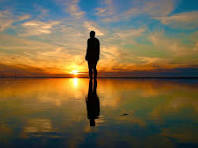

In [2]:
from IPython.display import Image
Image("architecture.jpg", width=600)

#### MNIST Dataset
* 70,000 pictures of handwritten digits 
* 28x28 pixel grayscale images, so there are 28x28 = 784 attributes each with values 0-255
* <span style="color:red">How many attributes would there be for a 28X28 RGB image?</span> = 28 * 28 * 3
* Possible labels: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 (multi-class classifcation)
* <span style="color:red">Is a neural net a good choice for this data? Why / what problems are neural nets best suited for?</span>

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test.shape

(10000, 28, 28)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
a = x_train[0]

for line in a:
    print ('  '.join(map(str, line)))

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  3  18  18  18  126  136  175  26  166  255  247  127  0  0  0  0
0  0  0  0  0  0  0  0  30  36  94  154  170  253  253  253  253  253  225  172  253  242  195  64  0  0  0  0
0  0  0  0  0  0  0  49  238  253  253  253  253  253  253  253  253  251  93  82  82  56  39  0  0  0  0  0
0  0  0  0  0  0  0  18  219  253  253  253  253  253  198  182  247  241  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  80  156  107  253  253  205  11  0  43  154  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  14  1  154  253  90  0  0  0  0  0 

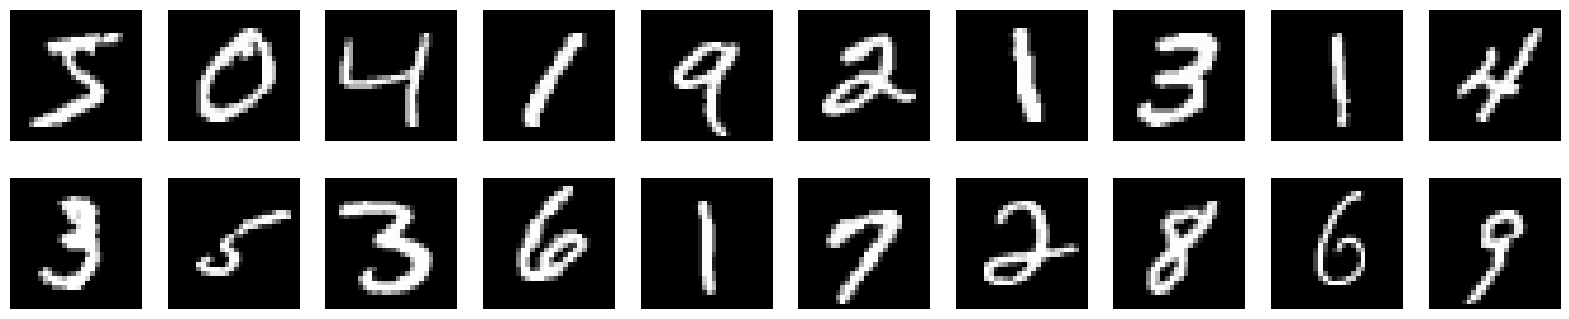

In [6]:
plt.figure(figsize=(20,4))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.axis('off')
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

In [7]:
print(y_train.shape)
y_train[0:20]

(60000,)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

#### Reformatting the data
- Values between 0-1
- Tensorflow takes in 4d data: the number of records, the height of the image, the width of the image, the number of channels (1 for grayscale images, 3 for RGB images). Use -1 for the number of records because it is dynamic.
- Make sure data is all of the same type
- Change label values 0-9 to len=10 arrays, <span style="color:red">why?</span>

In [8]:
# rescale the data to numbers between 0-1, by convention and to improve training efficiency
x_train = x_train / 255
x_test = x_test / 255

# store the pictures in an appropriate tensor 28x28 pictures with only 1 channel 
# the -1 parameter indicates keras should infer the shape of the matrix (in this case 60000)
x_train = x_train.reshape(-1,28,28,1) 
x_test = x_test.reshape(-1,28,28,1)

# tensorflow will not perform the necessary operations if data is stored as different types
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# change target variable to categorical attribute (one-hot-encoding):
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
a = np.round(x_train[0],decimals=1)
p = ""
for line in a:
    for i in range(0,len(line)):
        p += str(line[i][0])#; p += ""
    print(p); p = ""

0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.10.10.10.50.50.70.10.71.01.00.50.00.00.00.0
0.00.00.00.00.00.00.00.00.10.10.40.60.71.01.01.01.01.00.90.71.00.90.80.30.00.00.00.0
0.00.00.00.00.00.00.00.20.91.01.01.01.01.01.01.01.01.00.40.30.30.20.20.00.00.00.00.0
0.00.00.00.00.00.00.00.10.91.01.01.01.01.00.80.71.00.90.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.30.60.41.01.00.80.00.00.20.60.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.10.00.61.00.40.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.51.00.70.00.00.00.00.00.00.00.

 #### Modeling

We are going to build the following model:

| layer        | filters   | filter size| sride length | activation | output dimension |
|--------------|-----------|------------|--------------|------------|------------------|
| Conv2D       |  32       | 5x5        | 1            | relu       | 24x24            |
| Conv2D       | 64        | 5x5        | 1            | relu       | 20x20            |
| MaxPooling2D |  -        | 2x2        | 2            | -          | 10x10            |
| Flatten()    |  -        | -          | -            | -          | -                |
| Dense(output)|  -        | -          | -            | softmax    | ?                |

#### Convolutional (feature mapping) layer
Terminology: stride length, kernel/filter size, channels

Function: w1 * in1 + w2 * in2 + w3 * in3 + w4 * in4 + b

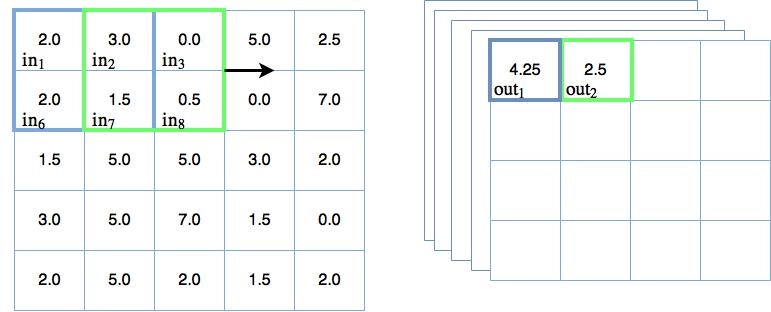

#### Pooling (down sampling) layer
Terminology: padding

Function: max()

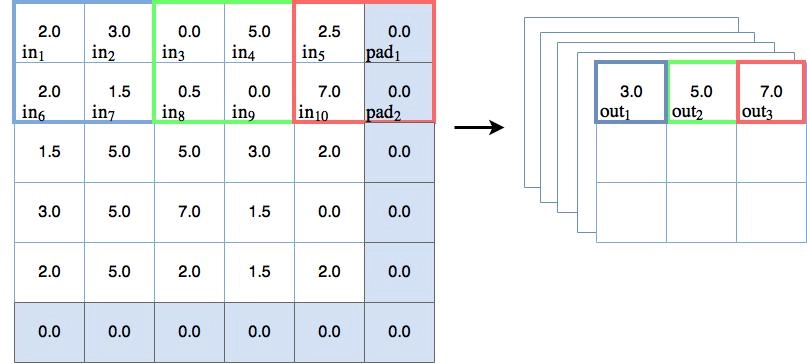

#### Flatten
The output of the covolution and pooling layers contain new high-level data features which describe the input image rather than the low-level pixel data we started with. These need to be "flattened" into a vector which becomes the input into the last fully-connected or "dense" layer of the CNN - like tagging a simple neural network classifier onto the end. Neural networks are good at dimension reduction and feature extraction, <span style="color:red">can you see how our neural net does this?</span>

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Keras Sequential models can be constructed layer by layer. 

In [12]:
#Initialize the Sequential model:
model = Sequential() 

#Add a 2D convolutional layer: params (in order): number of filters, size of the kernel, the others are written there.
model.add(Conv2D(32, (5, 5), strides=(1, 1), input_shape=(28, 28, 1), activation='relu', data_format="channels_last")) 

#Another 2D convolutional layer: declaring the input shape is only necessary for the first layer
model.add(Conv2D(64, (5, 5), activation='relu'))

#Add a 2x2 MaxPool layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#Flatten the output, because the next layer will be a Dense (Fully Connected) layer, which accepts 1 dimensional inputs.
model.add(Flatten())

#Another Dense layer: Why do we use 10 output units? 
model.add(Dense(10, activation='softmax'))

#Compiling the model, loss: categorical crossentropy, it is the most popular for these kind of problems,
#optimizer: adam, a faster variant of the stochastic gradient method
#metrics: accuracy (We want to know the accuracy after each epoch.)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
#We want to stop the training process, if the loss on the validation set did not improve since 10 epochs.
early_stopping=EarlyStopping(patience=10, verbose=1)

#We do not want to store the weights of the model after the last epoch, we want the weights of the best model!
#We will store those weights in a file weights.hdf5
checkpointer=ModelCheckpoint(filepath='weights.keras', save_best_only=True, verbose=1)

#Fit with 5 epochs of 128 records each (batch_size) and 0.2 validation split
#Specify which callbacks or 'plugins' to use.
network_history = model.fit(x_train, y_train, batch_size=128, 
                            epochs=5, verbose=1, validation_split=0.2,
                  callbacks=[checkpointer, early_stopping])

Epoch 1/5


374/375 [============================>.] - ETA: 0s - loss: 0.2012 - accuracy: 0.9397
Epoch 1: val_loss improved from inf to 0.06849, saving model to weights.keras
375/375 [==============================] - 17s 43ms/step - loss: 0.2007 - accuracy: 0.9398 - val_loss: 0.0685 - val_accuracy: 0.9807
Epoch 2/5
374/375 [============================>.] - ETA: 0s - loss: 0.0551 - accuracy: 0.9831
Epoch 2: val_loss improved from 0.06849 to 0.05062, saving model to weights.keras
375/375 [==============================] - 15s 41ms/step - loss: 0.0550 - accuracy: 0.9831 - val_loss: 0.0506 - val_accuracy: 0.9851
Epoch 3/5
374/375 [============================>.] - ETA: 0s - loss: 0.0393 - accuracy: 0.9876
Epoch 3: val_loss improved from 0.05062 to 0.04482, saving model to weights.keras
375/375 [==============================] - 16s 42ms/step - loss: 0.0392 - accuracy: 0.9876 - val_loss: 0.0448 - val_accuracy: 0.9859
Epoch 4/5
374/375 [============================>.] - ETA: 0s - loss: 0.0

Before we can evaluate the results, we have to load the weights of the best model!

In [14]:
from keras.models import load_model

loaded_model = load_model("weights.keras")
test_err = loaded_model.evaluate(x_test,y_test)
print("Loss on test set:", test_err[0], "Accuracy on test set:", test_err[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0337 - accuracy: 0.9905
Loss on test set: 0.03370930626988411 Accuracy on test set: 0.9904999732971191


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
import numpy as np
y_pred = model.predict(x_test)
print(y_pred[0])
y_pred = np.argmax(y_pred,1)
print(y_pred[0])
y_true = np.argmax(y_test,1)
print(y_true[0])

print("Test accuracy: %g" %(accuracy_score(y_true, y_pred)))
print("Precision", precision_score(y_true, y_pred, average="macro")) #one vs rest averages or global
print("Recall", recall_score(y_true, y_pred, average="macro")) #macro calculates the average of the recall for each class
print("f1_score", f1_score(y_true, y_pred, average="macro")) #macro is good for balanced data set, micro is good for imbalanced
print("\n Confusion matrix ")
conf=confusion_matrix(y_true, y_pred)
print(conf)

313/313 [==============================] - 2s 4ms/step
[5.1199188e-12 3.9738011e-11 8.4664373e-07 4.9636697e-06 4.0675281e-13
 7.6589890e-10 3.8374085e-19 9.9999261e-01 2.6821318e-09 1.5395556e-06]
7
7
Test accuracy: 0.9903
Precision 0.9902924974699434
Recall 0.9901069981759711
f1_score 0.9901875585418424

 Confusion matrix 
[[ 972    0    1    0    0    1    2    1    2    1]
 [   0 1132    1    2    0    0    0    0    0    0]
 [   0    1 1024    0    1    0    1    5    0    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   0    0    0    0  974    0    1    0    2    5]
 [   1    0    0    9    0  879    1    1    0    1]
 [   3    2    0    0    2    3  947    0    1    0]
 [   0    2    3    3    0    0    0 1017    1    2]
 [   2    0    3    2    1    0    3    4  952    7]
 [   1    0    1    0    3    3    0    2    0  999]]


We can also plot the confusion matrix as a heatmap!

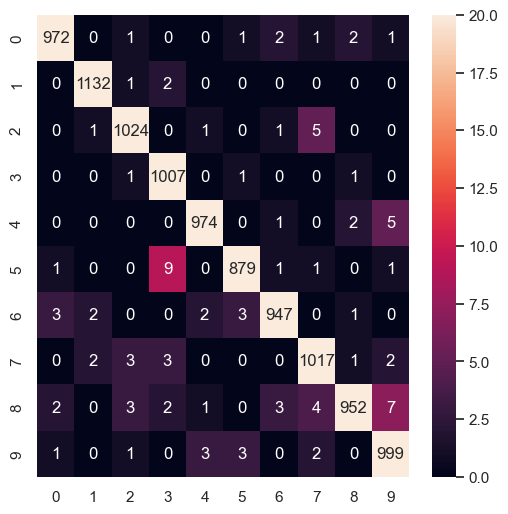

In [16]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.heatmap(conf, annot=True, fmt='d', vmax=20)
plt.show()


### Testing on own handwritten digits

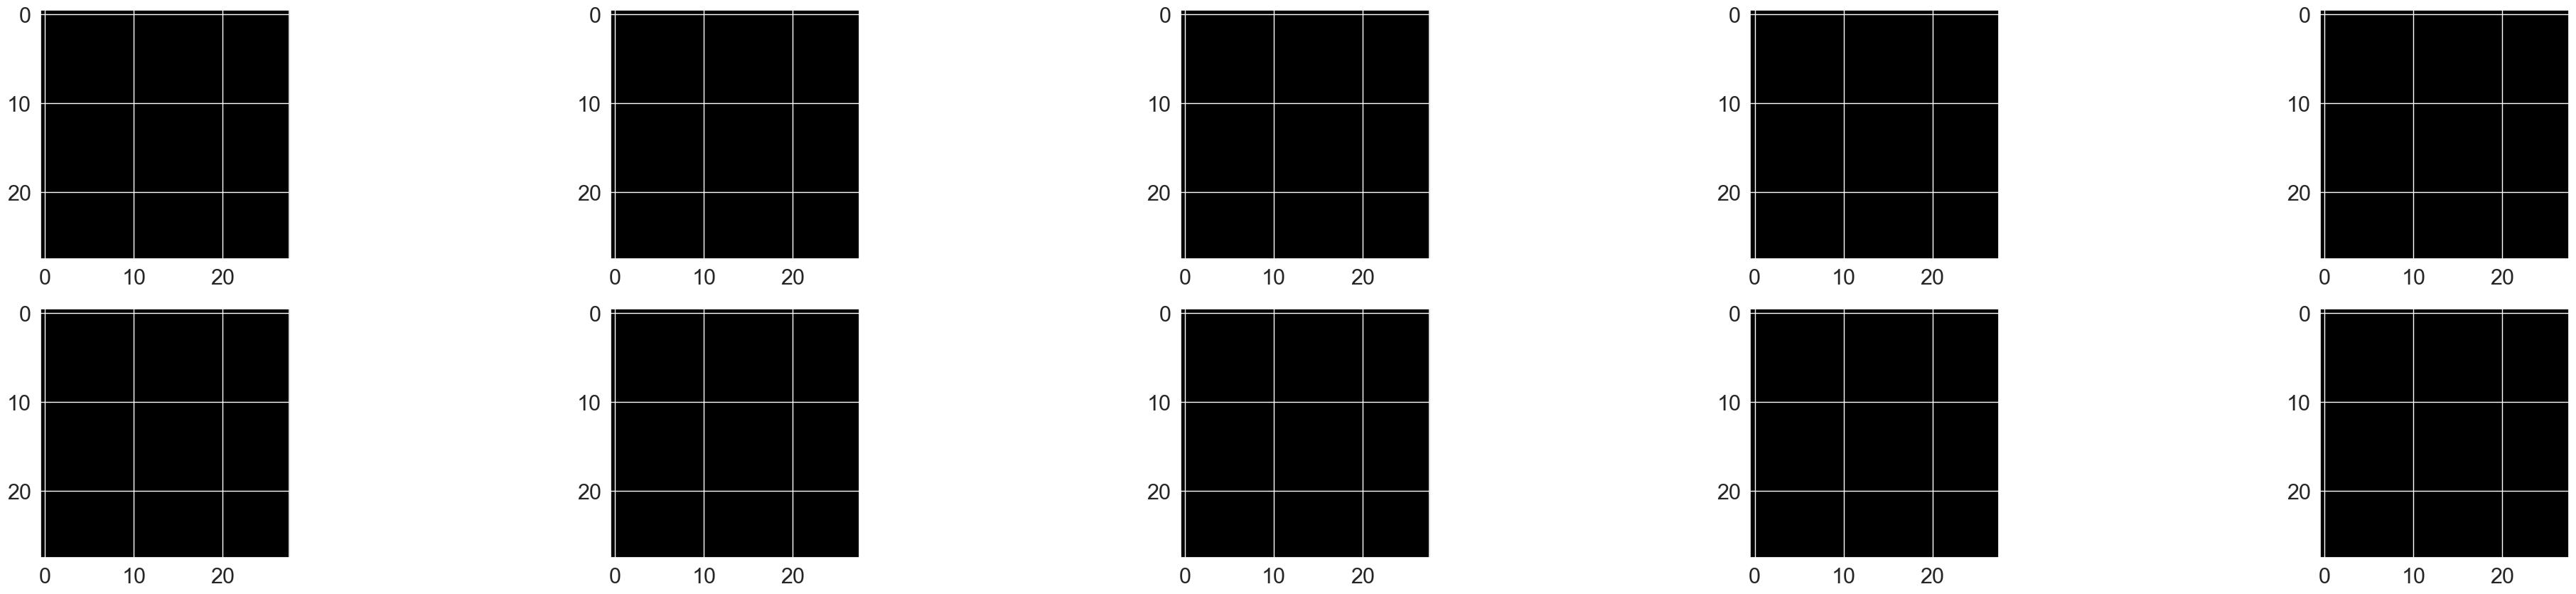

In [17]:
from PIL import Image
from PIL import ImageOps
sns.set(font_scale = 2)

# visualizing hand-written digits
thresholds = {}
thresholds[ 0 ] = ( 225 , 229 , 451 , 458 )
thresholds[ 1 ] = ( 675 , 229 , 901 , 458 )
thresholds[ 2 ] = ( 1126 , 229 , 1352 , 458 )
thresholds[ 3 ] = ( 1576 , 229 , 1802 , 458 )
thresholds[ 4 ] = ( 2027 , 229 , 2253 , 458 )
thresholds[ 5 ] = ( 225 , 687 , 451 , 916 )
thresholds[ 6 ] = ( 675 , 687 , 901 , 916 )
thresholds[ 7 ] = ( 1126 , 687 , 1352 , 916 )
thresholds[ 8 ] = ( 1576 , 687 , 1802 , 916 )
thresholds[ 9 ] = ( 2027 , 687 , 2253 , 916 )

plt.figure( figsize = ( 50 , 10 ) )
for i in range( 10 ):
    image = Image.open("digits.jpg" )
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    plt.subplot( 2 , 5 , i + 1 )
    plt.imshow( image_data, cmap = plt.cm.gray )

1/1 [==============================] - 0s 21ms/step


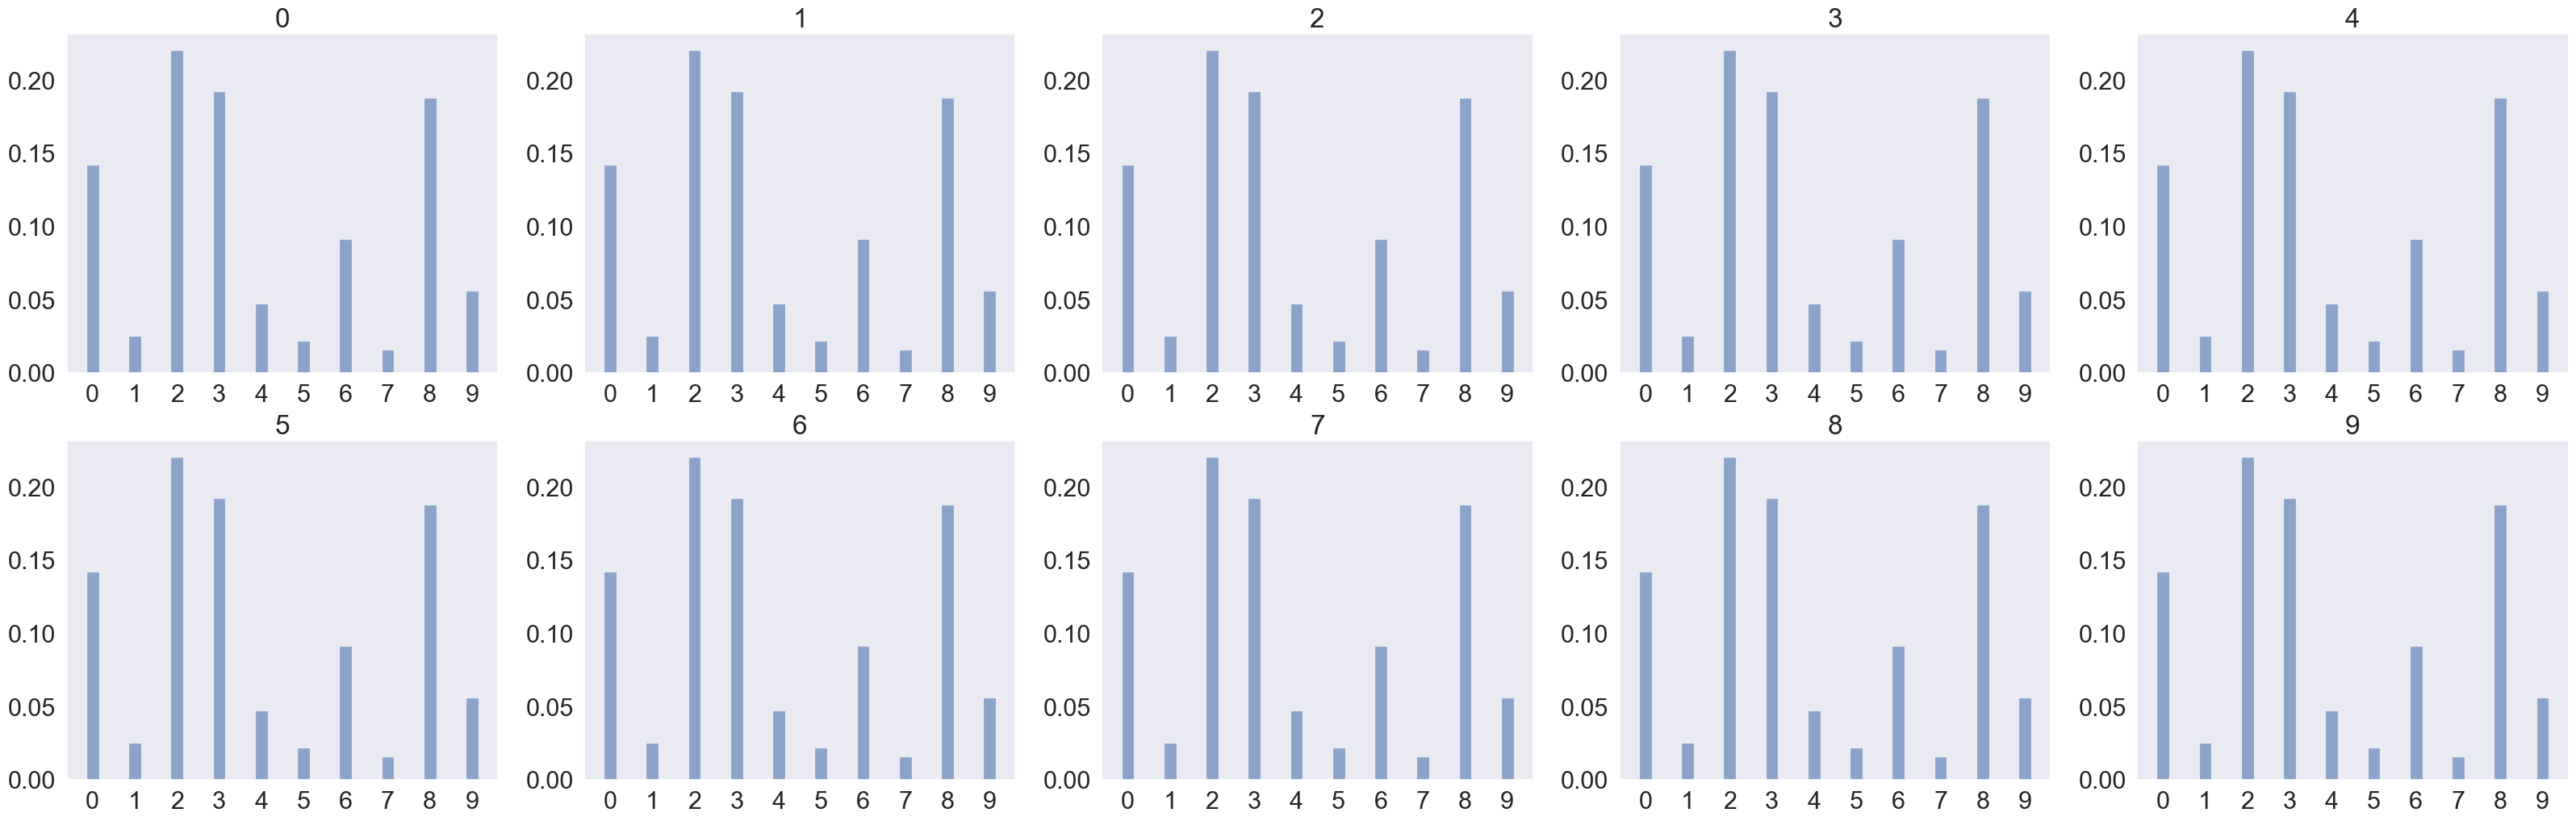

In [18]:
# using the trained model to recognize hand-written digits
plt.figure( figsize = ( 40 , 12 ) )
for i in range( 10 ):
    image = Image.open( "digits.jpg")
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    image_data = image_data.reshape( -1 , 28 , 28 , 1 )
    predictions = model.predict( image_data > 0.8 )
    plt.subplot( 2 , 5 , i + 1 )
    plt.bar( range( 10 ) , predictions[ 0 ] , 0.3 , color = "b" , alpha = 0.6 )
    plt.title( i )
    plt.grid()
    plt.xticks( range( 10 ) )

### Visualize the output of the 2D convolutional layers.

In [19]:
from keras.models import Model
from keras.layers import Input

# we will look at just the first two (convolutional) layers of our model
layer_outputs = [layer.output for layer in model.layers[0:2]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

In [20]:
# first 4 pictures in the test set:
img = x_test[0:4].reshape(-1,28,28,1)
# with labels: 7,2,1,0
np.argmax(y_test[0:4],axis=1)

array([7, 2, 1, 0], dtype=int64)

1/1 [==============================] - 0s 74ms/step


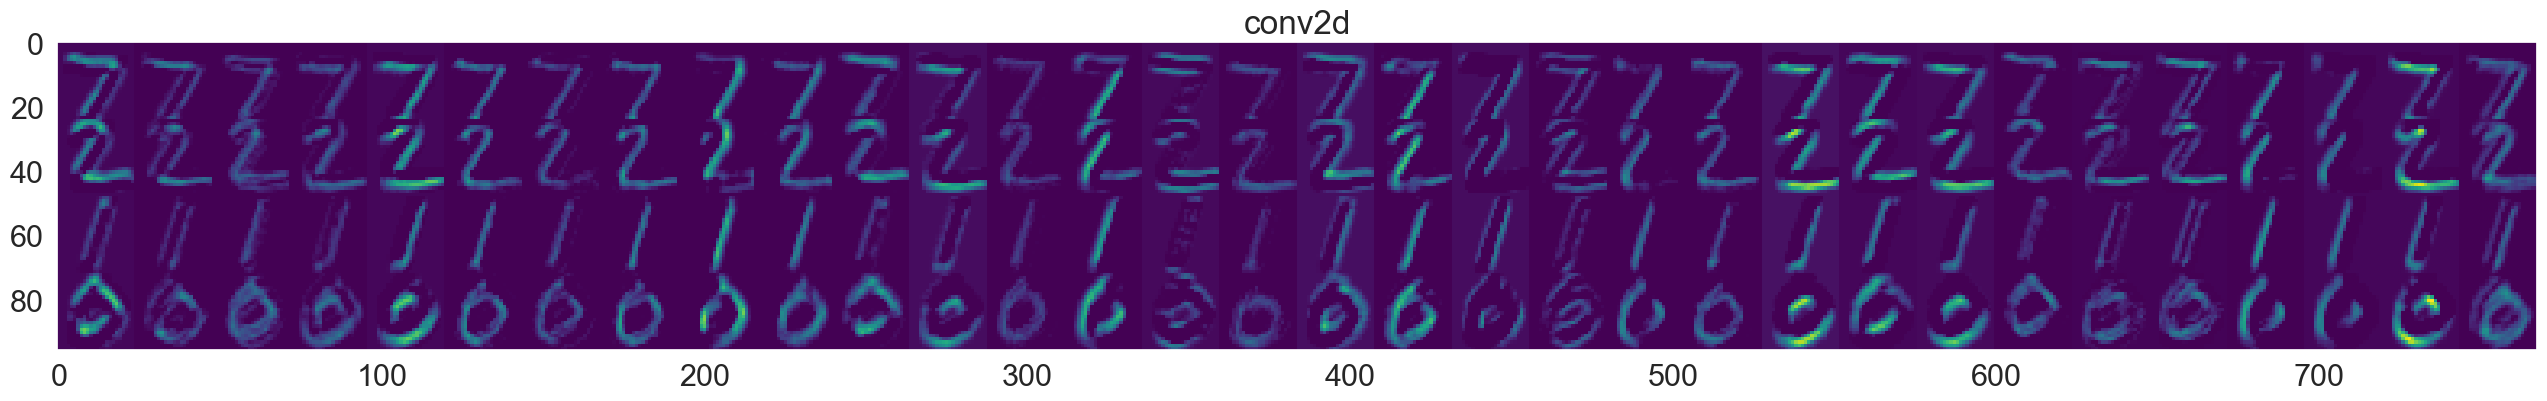

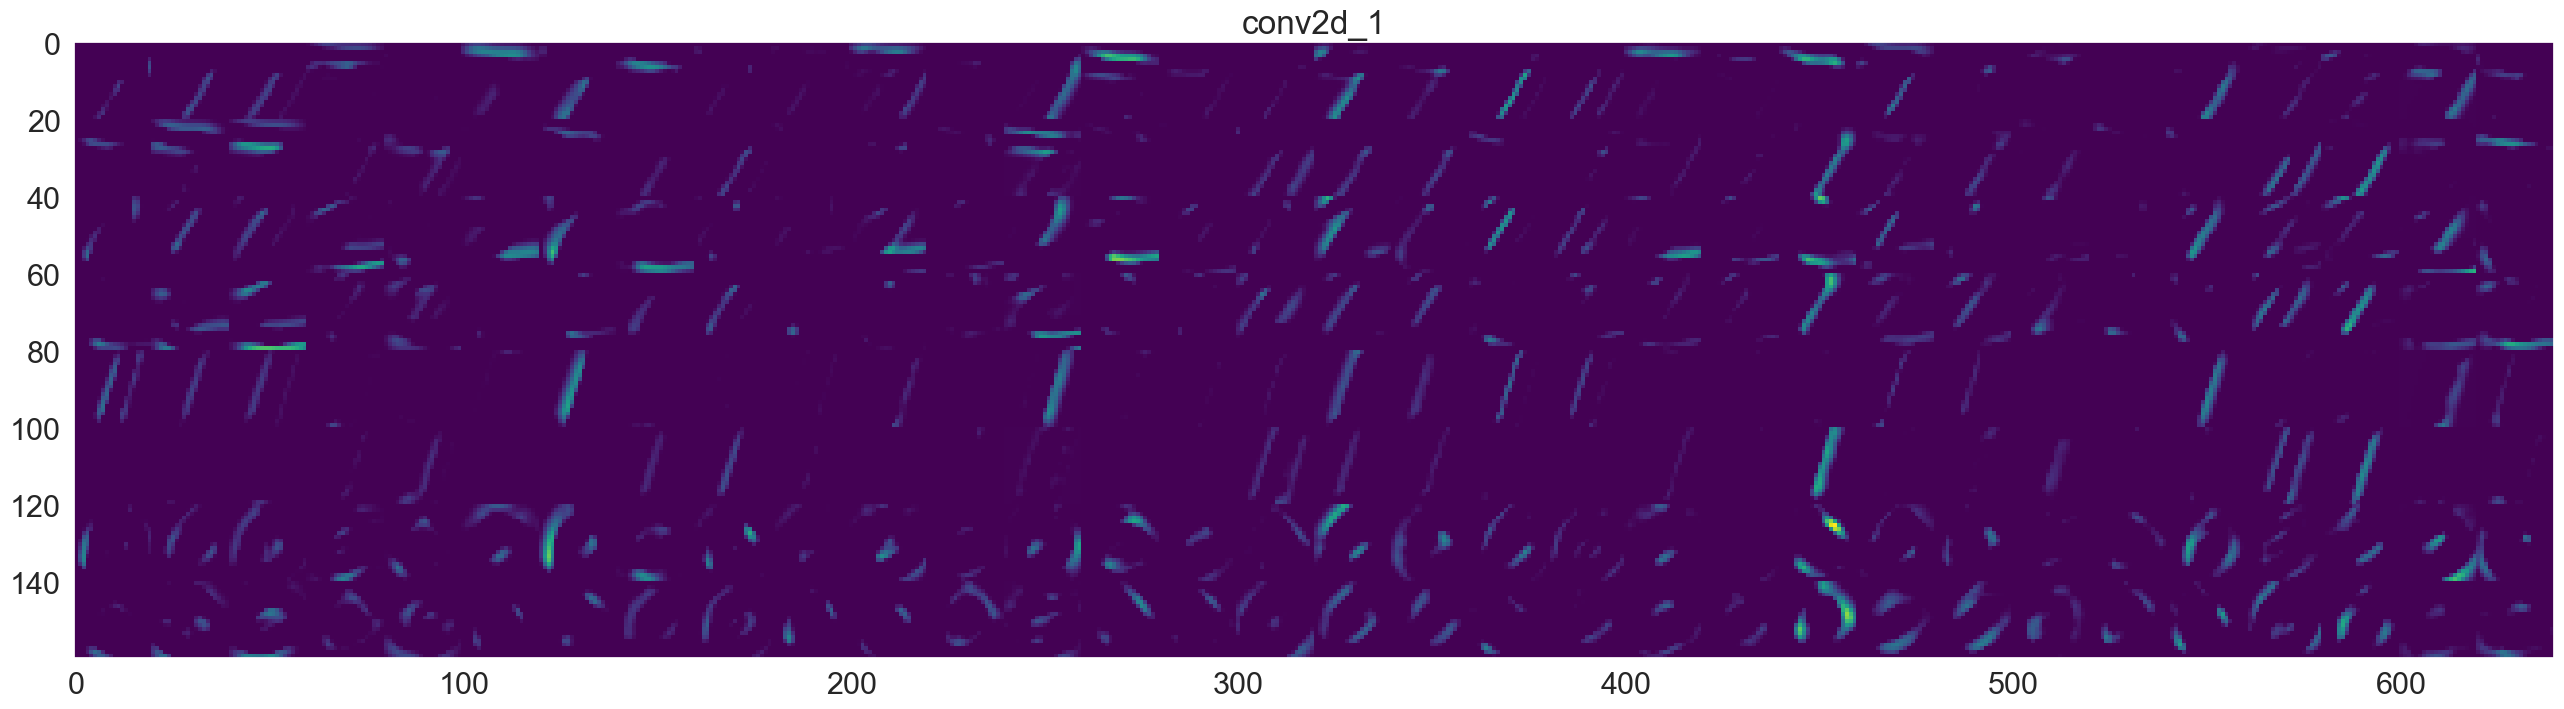

In [21]:
# we won't go through this one, check link 5 below for explanation.
activations = activation_model.predict(img)
layer_names = []
for layer in model.layers[0:2]:
    layer_names.append(layer.name)
images_per_row = 32
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    ns= layer_activation.shape[0]
    display_grid = np.zeros((size * n_cols*ns, images_per_row * size))
    for s in range(ns):
      for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[s,
                                             :, :,
                                             col * images_per_row + row]    
            if False:                                             
              channel_image -= channel_image.mean() 
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[(col) * size+ size * n_cols*s: (col + 1) * size+ size * n_cols*s, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

References / Further reading:

1. https://adventuresinmachinelearning.com/neural-networks-tutorial/
2. https://adventuresinmachinelearning.com/python-tensorflow-tutorial/
3. https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-tensorflow/
4. http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/
5. https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-the-mnist-dataset-2c34426416c8